In [1]:
# Цель проекта: отобрать переменные для последующего построения модели, позволяющей на ранней стадии выявлять студентов, находящихся в группе риска.
# Для этого необходимо провести расследовательный анализ данных, исследовать влияние условий жизни учащихся на их успеваемость по математике.

In [2]:
# Переменные, которые содержит датасет:

# 1 school — аббревиатура школы, в которой учится ученик
# 2 sex — пол ученика ('F' - женский, 'M' - мужской)
# 3 age — возраст ученика (от 15 до 22)
# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# 16 schoolsup — дополнительная образовательная поддержка (yes или no)
# 17 famsup — семейная образовательная поддержка (yes или no)
# 18 paid — дополнительные платные занятия по математике (yes или no)
# 19 activities — дополнительные внеучебные занятия (yes или no)
# 20 nursery — посещал детский сад (yes или no)
# 21 higher — хочет получить высшее образование (yes или no)
# 22 internet — наличие интернета дома (yes или no)
# 23 romantic — в романтических отношениях (yes или no)
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# 28 absences — количество пропущенных занятий
# 29 score — баллы по госэкзамену по математике

# начальное колличество значимых строк - 396

In [3]:
from typing import Union
import numpy as np
import pandas as pd
from numpy import ndarray
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# При открытии датасета убираем пустые строки и строки, в которых значение score Nan, т.к. они являются целью нашей обработки
csv = pd.read_csv("stud_math.xls").dropna(how="all", subset=['score'])
# Для удобства переназовем колонку
csv = csv.rename(columns={'studytime, granular': 'studytime_granular'})

In [5]:
# Посмотрим данные датасета и типы данных у столбцов
display(csv.head(10))
csv.info()
# До обработки датасета значащие строки - 395
# После открытия с предусловиями - 389

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              389 non-null    object 
 1   sex                 389 non-null    object 
 2   age                 389 non-null    int64  
 3   address             374 non-null    object 
 4   famsize             362 non-null    object 
 5   Pstatus             344 non-null    object 
 6   Medu                386 non-null    float64
 7   Fedu                365 non-null    float64
 8   Mjob                370 non-null    object 
 9   Fjob                353 non-null    object 
 10  reason              372 non-null    object 
 11  guardian            358 non-null    object 
 12  traveltime          361 non-null    float64
 13  studytime           382 non-null    float64
 14  failures            367 non-null    float64
 15  schoolsup           380 non-null    object 
 16  famsup  

In [6]:
# Предобработка датасета, замена пустых значений
# Функция для вычисления среднего и моды для каждого столбца в зависимости от типа данных
def calculate_mean(column_data: Series) -> Union[ndarray, str]:
    if np.issubdtype(column_data.dtype, np.number):  # определяем тип данных
        # для числовых столбцов считаем среднее
        return round(np.mean(column_data))
    else:
        return column_data.mode().values[0]  # для нечисловых - моду


# Заменяем пустые значения на среднее/моду
for columnName, columnData in csv.iteritems():
    csv[columnName] = columnData.replace(np.nan, calculate_mean(columnData))

In [7]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              389 non-null    object 
 1   sex                 389 non-null    object 
 2   age                 389 non-null    int64  
 3   address             389 non-null    object 
 4   famsize             389 non-null    object 
 5   Pstatus             389 non-null    object 
 6   Medu                389 non-null    float64
 7   Fedu                389 non-null    float64
 8   Mjob                389 non-null    object 
 9   Fjob                389 non-null    object 
 10  reason              389 non-null    object 
 11  guardian            389 non-null    object 
 12  traveltime          389 non-null    float64
 13  studytime           389 non-null    float64
 14  failures            389 non-null    float64
 15  schoolsup           389 non-null    object 
 16  famsup  

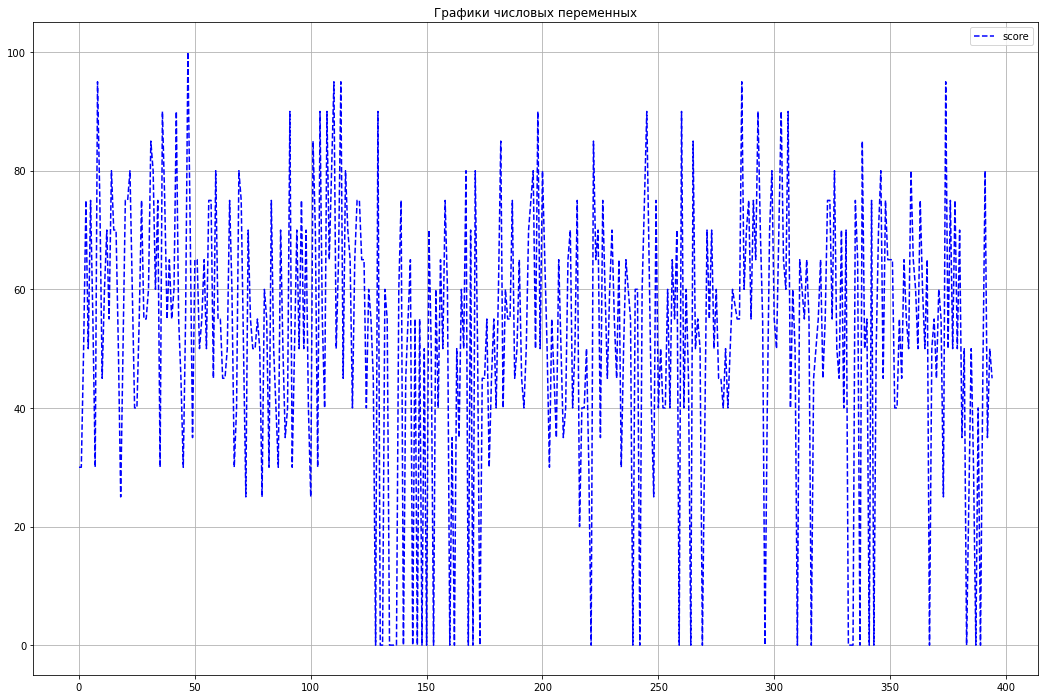

In [8]:
# С помощью графиков первично осмотрит датасет на наличие выбросов и подозрительных данных. Ориентируемся по описанию, предложенному к датасету

# Настройка отображения графика
N = 3
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*N, plSize[1]*N))
plt.grid(True)
plt.title('Графики числовых переменных')

# От 15 до 22
# plt.plot(csv.age, 'b.-', label = 'age')

# # От 0 до 4 балов
# plt.plot(csv.Medu, 'g', label = 'Medu')
# plt.plot(csv.Fedu, 'r', label = 'Fedu')

# От 1 до 4 баллов
# plt.plot(csv.traveltime, 'c', label = 'traveltime')
# plt.plot(csv.studytime, 'b', label = 'studytime')

# От 0 до 3 баллов
# plt.plot(csv.failures, 'y', label = 'failures')

# От 1 до 5 баллов
# plt.plot(csv.famrel, 'b', label = 'famrel')
# plt.plot(csv.goout, 'r--', label = 'goout')
# plt.plot(csv.freetime, 'c--', label = 'freetime')
# plt.plot(csv.health, 'y--', label = 'health')

# plt.plot(csv.absences, 'y*-', label = 'absences')

plt.plot(csv.score, 'b--', label='score')

# plt.plot(csv.studytime_granular, 'b--', label = 'studytime_granular')

plt.legend()
plt.show()

In [9]:
# Устраняем выбросы/опечатки
# заменяем 40 на 4, т.к. всплеск единичен, и вероятно было опечаткой
csv.loc[csv['Fedu'] == 40, 'Fedu'] = 4
# заменяем значение -1 на 1 т.к оно единственное, и вероятнее всего было опечаткой
csv.loc[csv['famrel'] < 1, 'famrel'] = 1

In [10]:
# Визуально у колонки absences несколько выбросов
# Сортируем значения по убыванию
csv.absences.sort_values(ascending=False).head(15)

222    385.0
390    212.0
276     75.0
183     56.0
74      54.0
315     40.0
307     38.0
280     30.0
205     28.0
103     26.0
40      25.0
198     24.0
320     23.0
216     22.0
313     22.0
Name: absences, dtype: float64

In [11]:
# Проверяем частоту появления уникальных значений
csv.absences.value_counts()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
7.0       17
14.0      12
12.0      12
16.0       7
3.0        7
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

In [12]:
# Проверяем наличие выбросов математически, принимая наблюдение за выброс в следующих случаях:
# - если наблюдение меньше, чем значение нижнего квартиля минус межквартильного размаха,
# - если наблюдение больше, чем значение верхнего квартиля плюс межквартильного размаха.

qrmax = csv.absences.quantile(q=0.75, interpolation='midpoint')
qrmin = csv.absences.quantile(q=0.25, interpolation='midpoint')
vibrosmax = qrmax + (qrmax - qrmin)
# Отрицательных значений в данной колонке нет
vibrosmin = qrmin - (qrmax - qrmin)
# print(vibrosmax)
vibrosy = []
for x in csv.absences:
    if x > vibrosmax:
        vibrosy.append(x)
#         print(f"{x} - выброс")
#     else:
#         print("okay")
print(f"Колличество выбросов - {len(vibrosy)}")

# выбросов 28

Колличество выбросов - 28


In [13]:
# После удаления выбросов, датасет будет содержать на 7,2 % меньше данных
# Заменять данные значения не имеет смысла, т.к. доподлинно неизвестно - действительно ли ученики прогуливали так много или это опечатки
# Убираем из датасета выбросы в колонке absences
csv = csv.loc[csv['absences'] <= vibrosmax]
csv.loc[csv['absences'] <= vibrosmax].info()
# Количество значащих строк 361

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              361 non-null    object 
 1   sex                 361 non-null    object 
 2   age                 361 non-null    int64  
 3   address             361 non-null    object 
 4   famsize             361 non-null    object 
 5   Pstatus             361 non-null    object 
 6   Medu                361 non-null    float64
 7   Fedu                361 non-null    float64
 8   Mjob                361 non-null    object 
 9   Fjob                361 non-null    object 
 10  reason              361 non-null    object 
 11  guardian            361 non-null    object 
 12  traveltime          361 non-null    float64
 13  studytime           361 non-null    float64
 14  failures            361 non-null    float64
 15  schoolsup           361 non-null    object 
 16  famsup  

In [14]:
# Проверить столбец score - слишком много 0
# Сколько данных потеряет датасет, если убрать данные значения
# Провести анализ учитывая данные с 0 и после без 0

In [15]:
# Определяем количество уникальных значений для score
csv.score.value_counts()
# Значений 0.0 - 37(3 по частоте повторений).

50.0     51
55.0     42
0.0      37
75.0     33
60.0     30
40.0     27
70.0     27
65.0     27
45.0     23
80.0     16
30.0     12
90.0     10
35.0      8
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

In [16]:
# Аналогично проверяем на наличие иных выбросов
qrmax = csv.score.quantile(q=0.75, interpolation='midpoint')
qrmin = csv.score.quantile(q=0.25, interpolation='midpoint')
vibrosmax_s = qrmax + (qrmax - qrmin)
vibrosmin_s = qrmin - (qrmax - qrmin)
# print(vibrosmax_s, vibrosmin_s)
vibrosy_s = []
for x in csv.score:
    if x > vibrosmax_s:
        vibrosy_s.append(x)
#         print(f"{x} - выброс +")
    elif x < vibrosmin_s:
        vibrosy_s.append(x)
#         print(f"{x} - выброс -")
#     else:
#         print("okay")
print(f"Колличество выбросов - {len(vibrosy_s)}")

Колличество выбросов - 37


In [17]:
# При изьятии этих данных, датасет потеряет 10,2 % данных.
# С учетом всех предидущих обработок составляет датасет теряет 16,7 % данных от первоначального обьема.
# Исключать выбросы в рассматриваемом случае не вижу смысла, т.к. они могут отражать действительность(доподлинно неизвестно: возможно это реальные 0 за тест
# (не справились/вообще не ходили на тестирование(болели/отстранены/еще не были протестированы)).
# Мое решение - принять выбросы во внимание и проводить последующий анализ с их учетом.

In [18]:
# Оценка уникальных значений для номинативных переменных

pd.DataFrame(csv.school.value_counts())
# GP - 318, MS - 43

pd.DataFrame(csv.sex.value_counts())
# F- 186, M - 175

pd.DataFrame(csv.address.value_counts())
# U - 283, R - 78

pd.DataFrame(csv.famsize.value_counts())
# GT3 - 261, LE3 - 100

pd.DataFrame(csv.Pstatus.value_counts())
# T - 331, A - 30

pd.DataFrame(csv.Mjob.value_counts())
# other - 133, services - 91, at_home - 54, teacher - 52, health - 31

pd.DataFrame(csv.Fjob.value_counts())
# other - 213, services - 91, teacher - 27, at_home - 16, health - 14

pd.DataFrame(csv.reason.value_counts())
# course- 148, reputation - 93, home - 88, other - 32

pd.DataFrame(csv.guardian.value_counts())
# mother - 259, father - 84, other - 18

pd.DataFrame(csv.schoolsup.value_counts())
# no - 316, yes - 45

pd.DataFrame(csv.famsup.value_counts())
# yes - 231, no - 130

pd.DataFrame(csv.paid.value_counts())
# no - 220, yes - 141

pd.DataFrame(csv.nursery.value_counts())
# yes - 289, no - 72

pd.DataFrame(csv.romantic.value_counts())
# no - 251, yes - 110

,romantic
no,251
yes,110


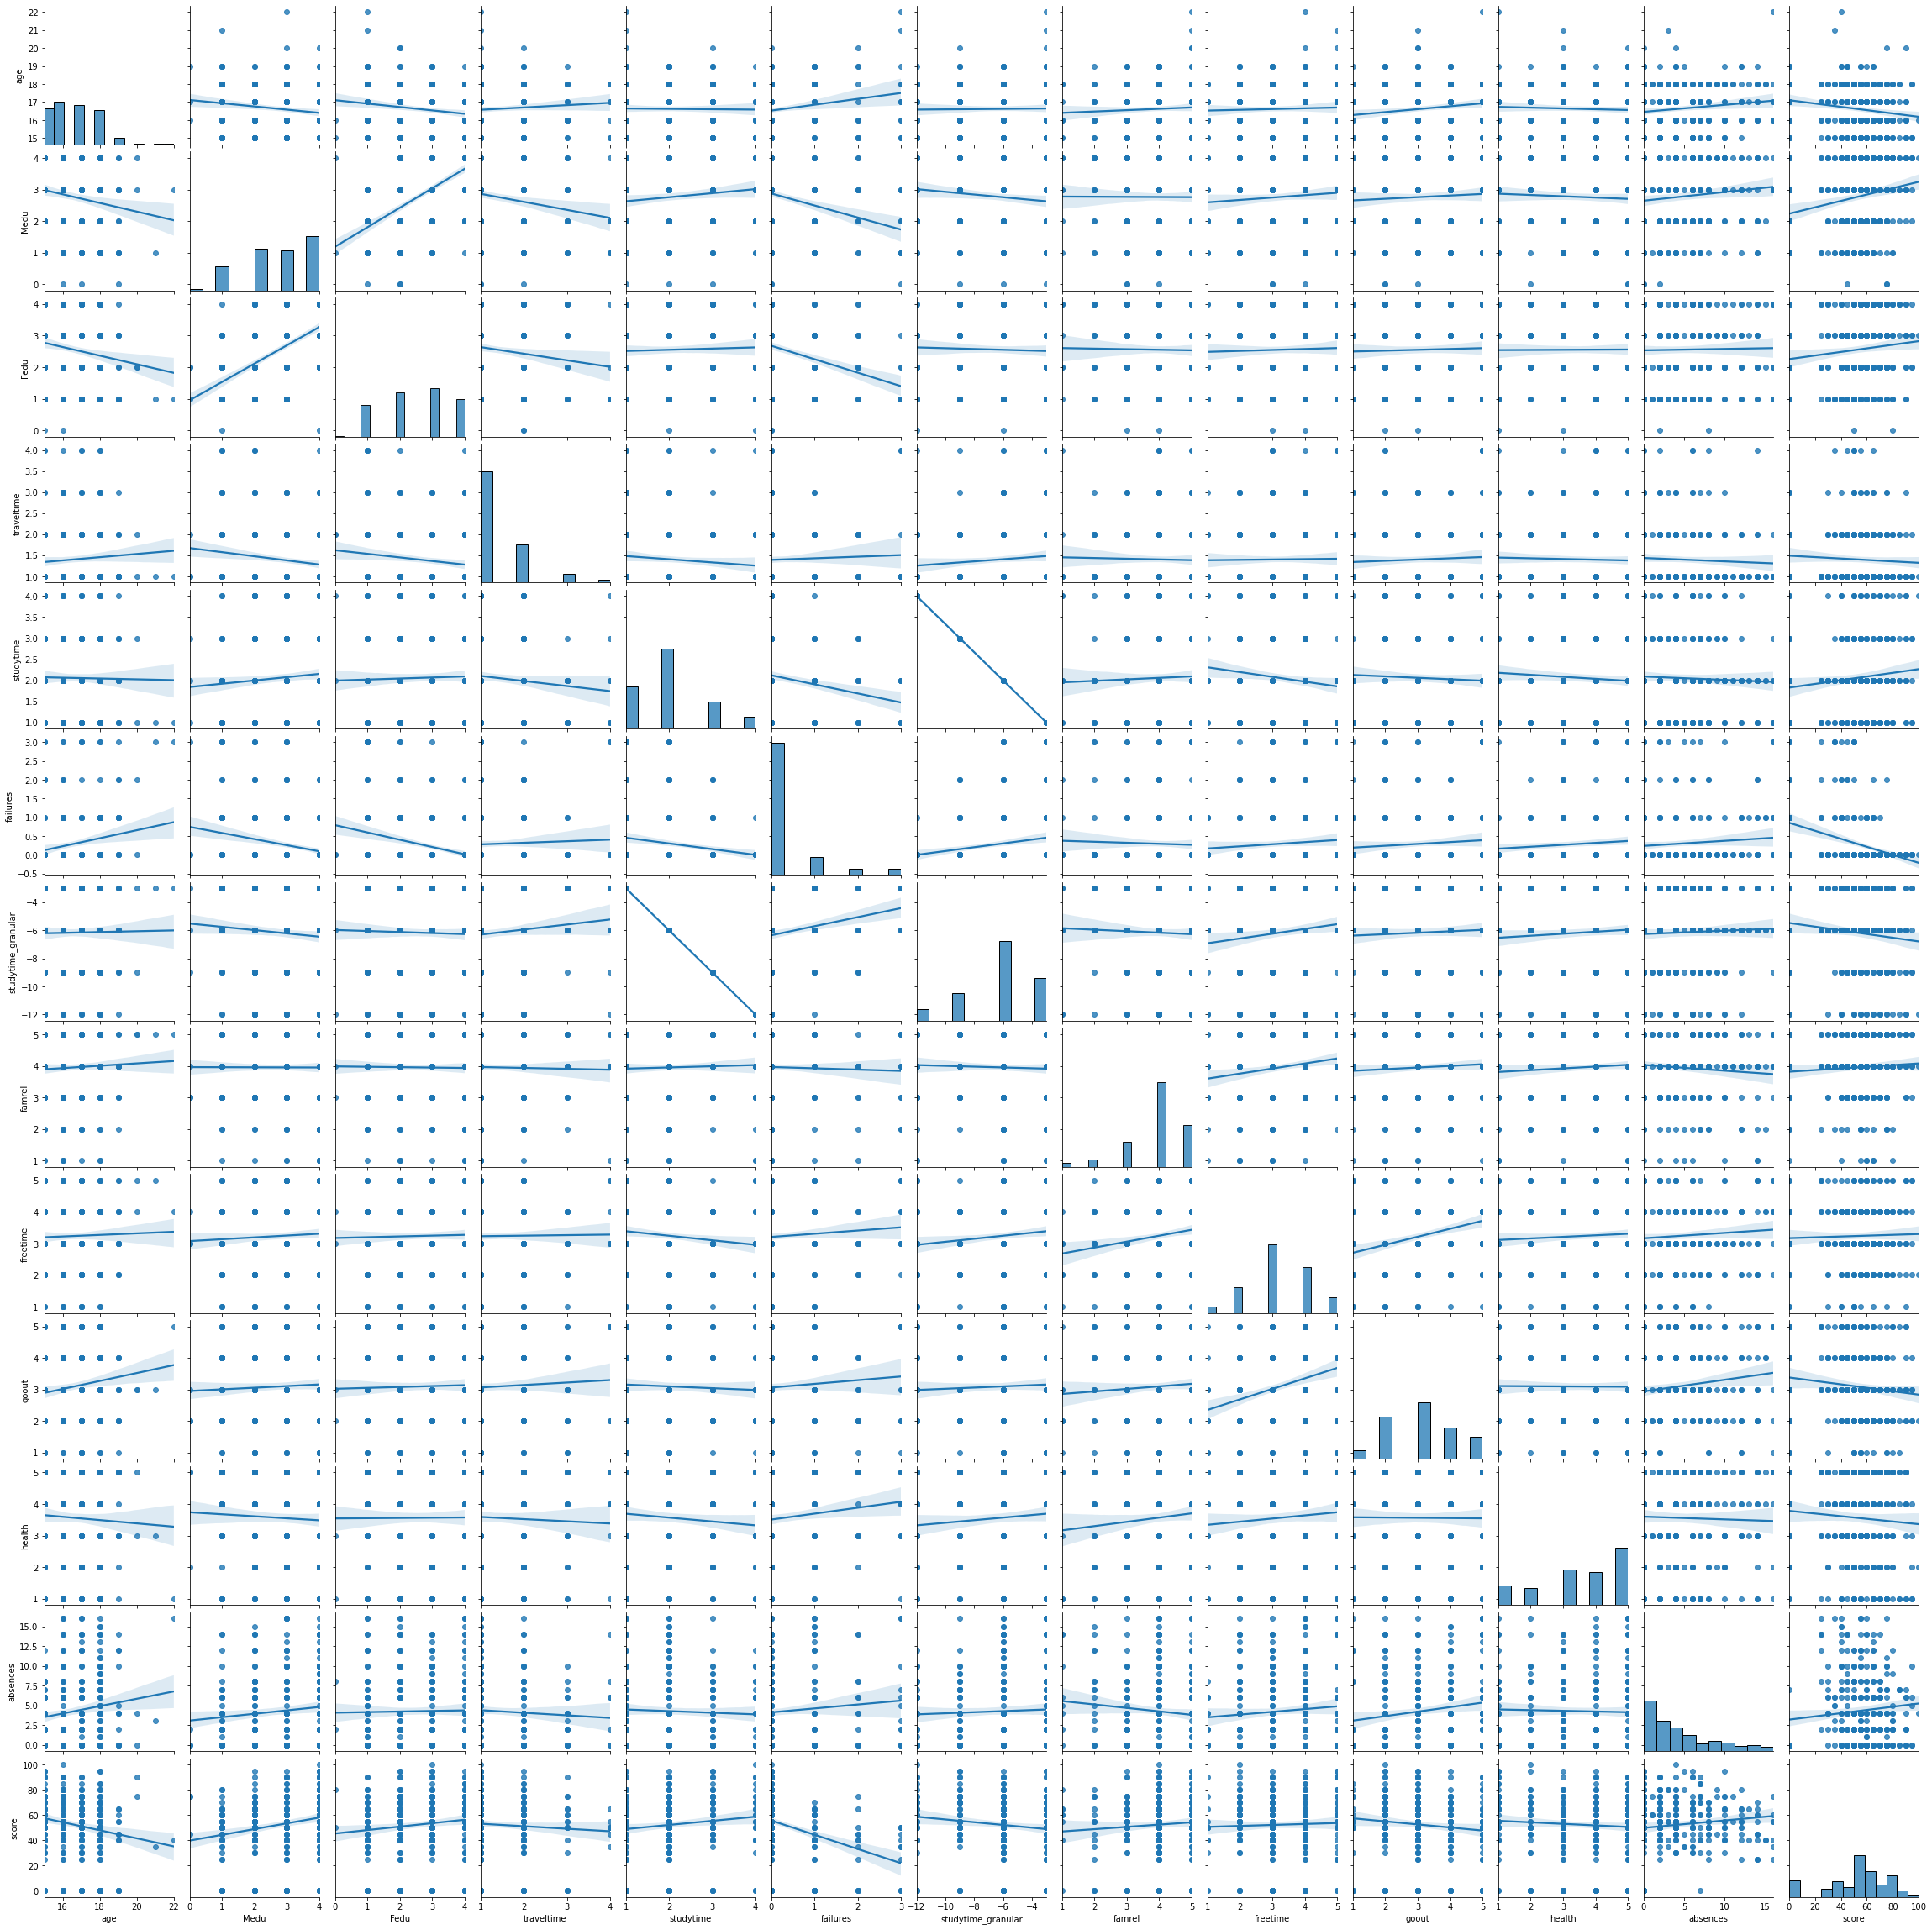

In [19]:
# Проведите корреляционный анализ количественных переменных
sns.pairplot(csv, kind='reg')

In [20]:
csv.corr()

# Все параметры слабоскоррелированы со значением score.

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156423,-0.160609,0.070469,-0.014184,0.186439,0.014184,0.053066,0.032335,0.143191,-0.047752,0.134606,-0.171643
Medu,-0.156423,1.000000,0.598300,-0.157908,0.100016,-0.248787,-0.100016,-0.003677,0.066456,0.051286,-0.051026,0.108935,0.214547
Fedu,-0.160609,0.598300,1.000000,-0.134031,0.030484,-0.287513,-0.030484,-0.014953,0.027545,0.027728,0.005898,0.017962,0.124612
traveltime,0.070469,-0.157908,-0.134031,1.000000,-0.095679,0.039949,0.095679,-0.021954,0.012132,0.047908,-0.034341,-0.051326,-0.058216
studytime,-0.014184,0.100016,0.030484,-0.095679,1.000000,-0.180912,-1.000000,0.036645,-0.127451,-0.044045,-0.076445,-0.040496,0.119747
failures,0.186439,-0.248787,-0.287513,0.039949,-0.180912,1.000000,0.180912,-0.033466,0.075712,0.075948,0.098356,0.082144,-0.346261
studytime_granular,0.014184,-0.100016,-0.030484,0.095679,-1.000000,0.180912,1.000000,-0.036645,0.127451,0.044045,0.076445,0.040496,-0.119747
famrel,0.053066,-0.003677,-0.014953,-0.021954,0.036645,-0.033466,-0.036645,1.000000,0.173396,0.064621,0.087088,-0.089154,0.068807
freetime,0.032335,0.066456,0.027545,0.012132,-0.127451,0.075712,0.127451,0.173396,1.000000,0.290151,0.069937,0.076952,0.031880
goout,0.143191,0.051286,0.027728,0.047908,-0.044045,0.075948,0.044045,0.064621,0.290151,1.000000,-0.006764,0.144724,-0.114759


In [21]:
# В качестве проверки убираем данные, в которых значение score равны нулю

# csv = csv.loc[csv['score'] > vibrosmin_s]
# csv.loc[csv['score'] > vibrosmin_s].info()
# csv.corr()

# Значения не меняются

In [22]:
# У детей, чьи родители имеют высшее образование оценки лучше
# Время на дорогу незначительно отрицательно влияет на оценки, скорее всего, потому что пункт 4 наименее редко употребляем

# Время на учебу положительно (не сильно) влиет на оценки.

# Неудачи сильно влияет на оценки. При этом, чем лучше образование у родителей, тем меньше неудач(нудачи-образование родителей)

# Возможно, под stadytime_granular понимается время подготовки к тесту.

# Количество времени с друзьями пагубно влияет на оценки

# Пропущенные уроки - мало влияют на оценки


# Значение параметров famrel, freetime, health - мало влияют на оценки. Их можно исключить.

<AxesSubplot:xlabel='failures,Medu,Fedu'>

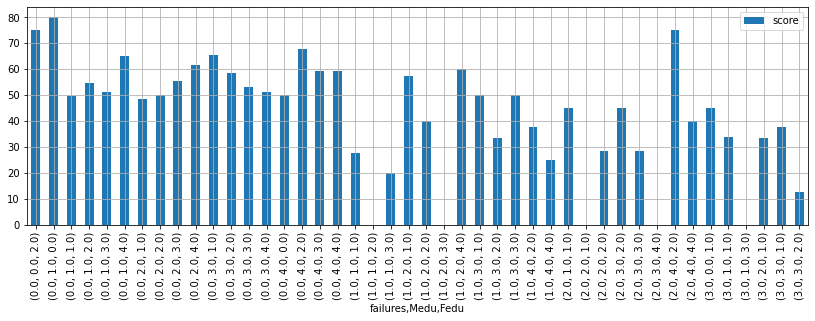

In [23]:
# Гипотеза (нудачи-образование родителей)
# Чем лучше образование родителей, тем меньше failures и выше средний балл
csv \
    .pivot_table(values='score', index=['failures', 'Medu', 'Fedu'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

<AxesSubplot:xlabel='traveltime,reason'>

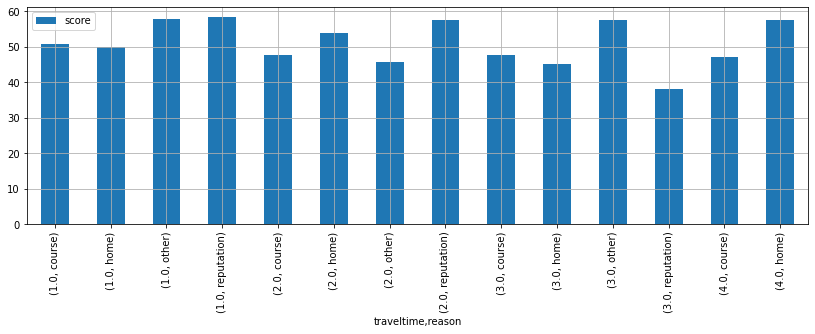

In [24]:
# Гипотеза(время до школы-причина)
# Причина выбора школы и кол-во времени до нее мало влияют на средний балл.
csv \
    .pivot_table(values='score', index=['traveltime', 'reason'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

<AxesSubplot:xlabel='studytime,reason'>

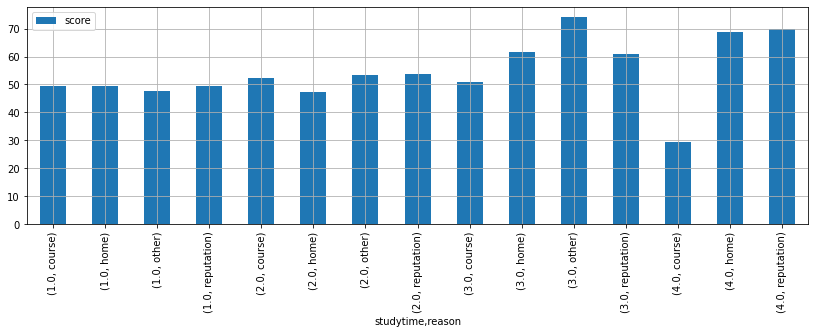

In [25]:
# Гипотеза(время учебы-причина)
# Средний балл выше у тех, кто уделяет учебе больше времени, за изсключением образовательной программы, возможно программа сложна, поэтому времени уделяется больше
csv \
    .pivot_table(values='score', index=['studytime', 'reason'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

<AxesSubplot:xlabel='absences,Pstatus,guardian'>

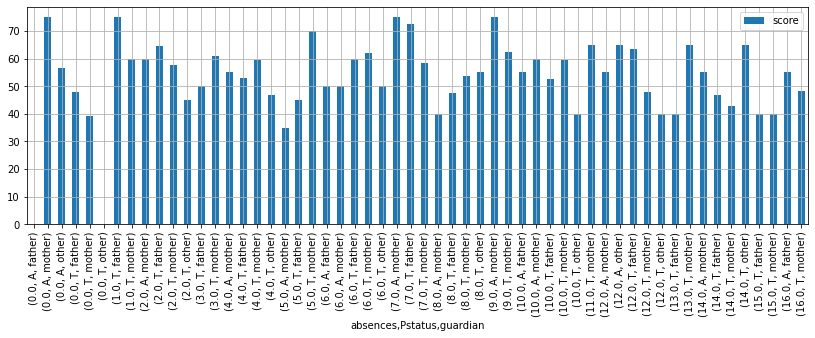

In [26]:
# Гипотеза (пропуски-опекуны-проживание родителей)
csv \
    .pivot_table(values='score', index=['absences', 'Pstatus', 'guardian'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)
# Количество пропусков и кто опекун не связаны, как и проживание родителей

In [27]:
# Корреляционный анализ количественных переменных

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=csv.loc[csv.loc[:, column].isin(
                    csv.loc[:, column].value_counts().index[:])],
                ax=ax, linewidth=2.5)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

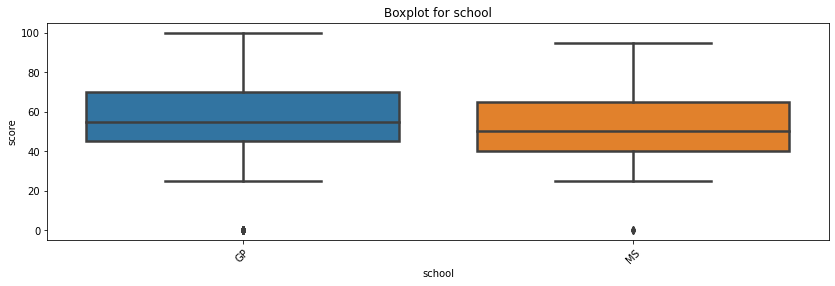

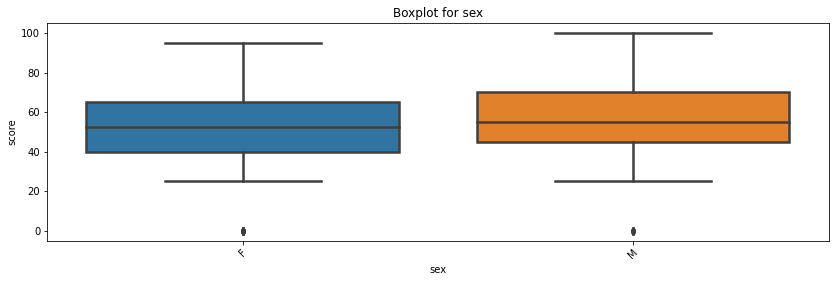

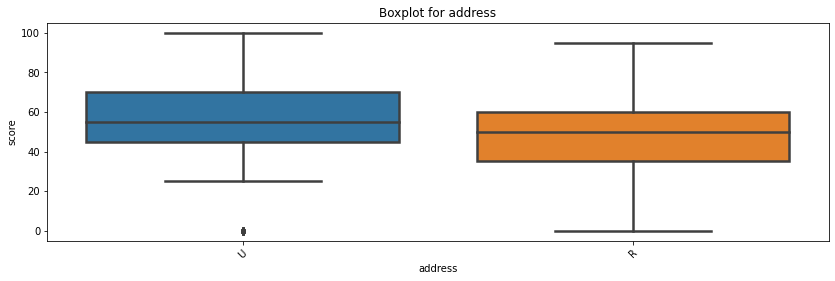

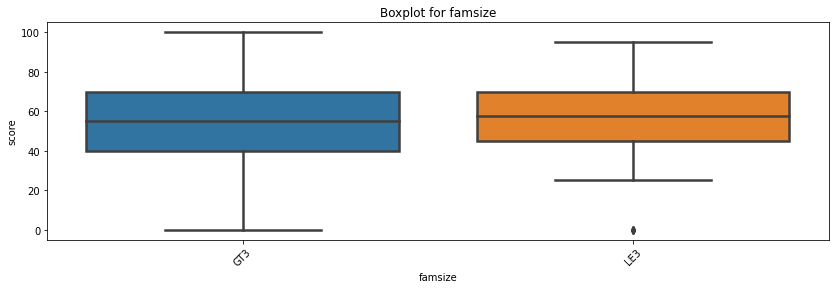

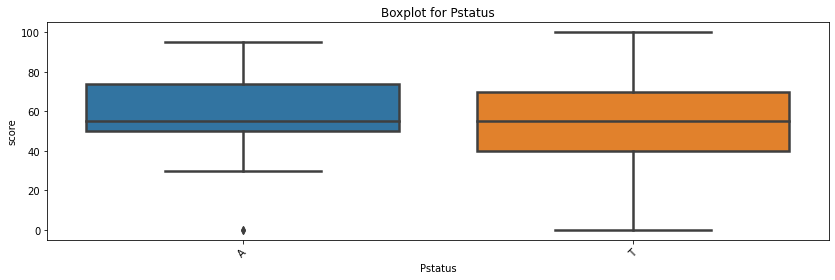

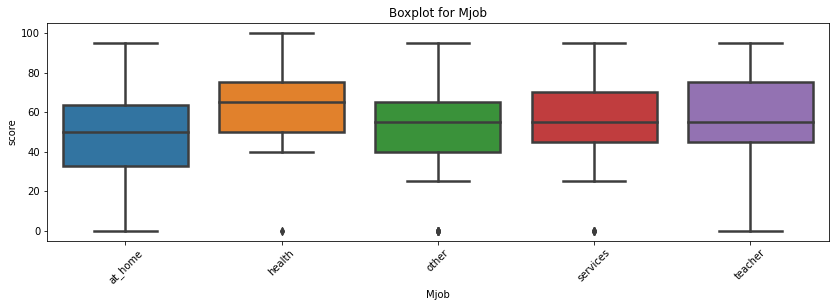

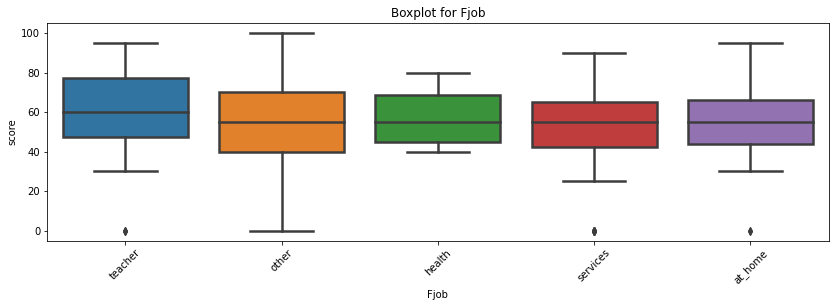

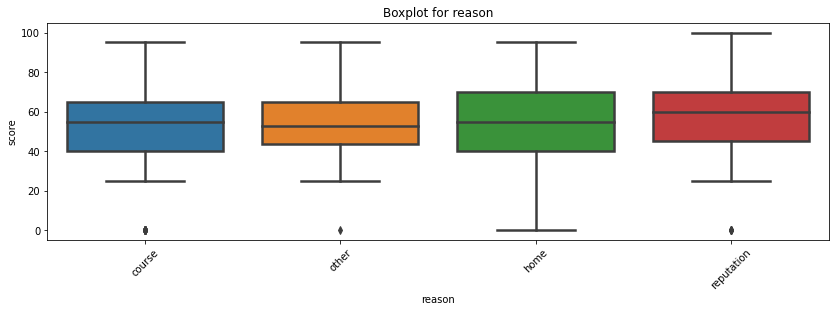

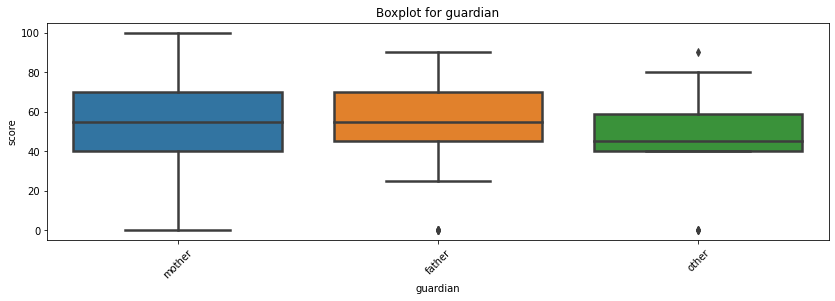

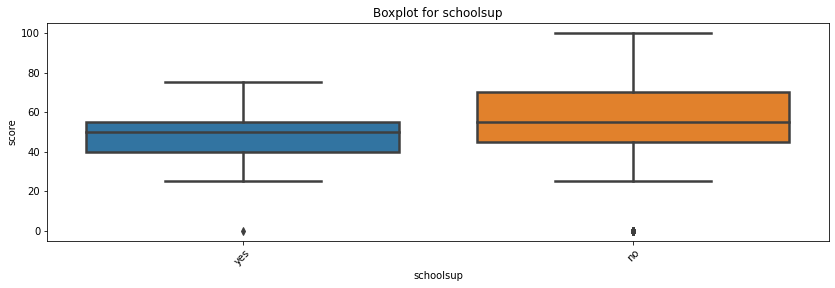

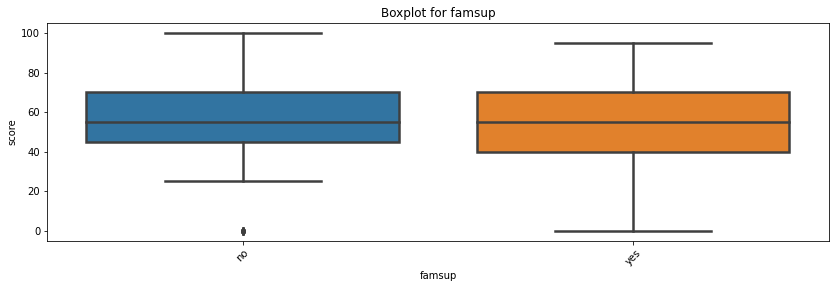

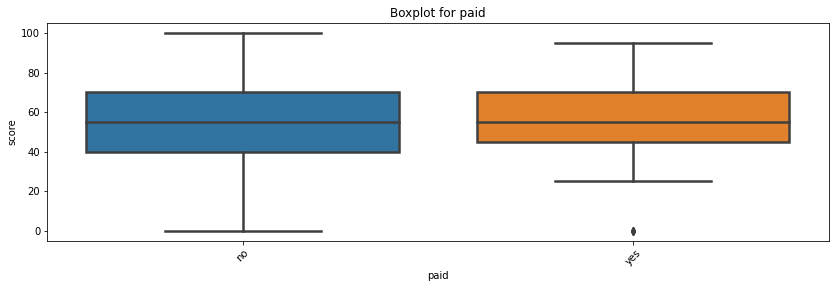

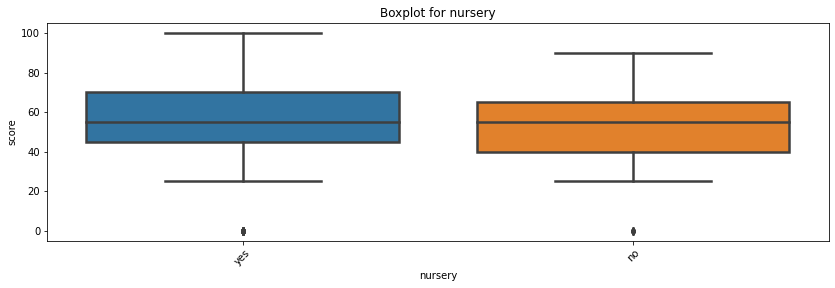

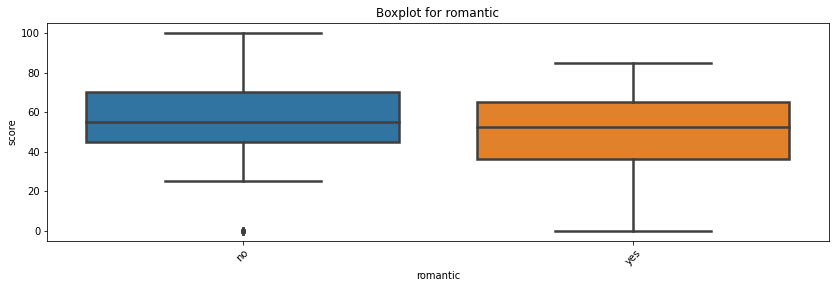

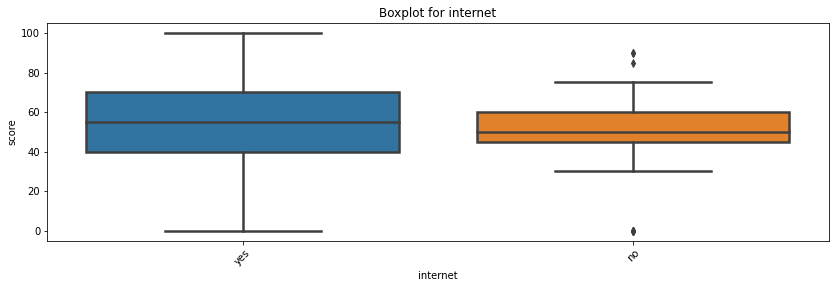

In [28]:
for col in ['school', 'sex', 'address',
            'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian',
            'schoolsup', 'famsup',
            'paid', 'nursery',
            'romantic', 'internet']:
    get_boxplot(col)

In [29]:
# У учеников школы GP оценки лучше
# У дувушек оченки в среднем выше

# У городских детей U оценки лучше, чем у деревенских (место проживания-время-дорога)(!!!место проживания-интернет-свободное время)

# Средний балл у детей, живущих в семьях, где меньше 3 детей, выше

# Живут ли родители вместе или раздельно мало влияет на оценки(баллы-опекун-проживание)

# Лучше оценки у детей, матери которых работают в сфере здравоохранения, а отцы - учителя(баллы-работа)

# Средний балл у детей, выбравших школу из-за ее репутации, выше

# Дети, чьими опекунами являются отцы - имеют средний балл выше, хуже оценки у тех, кто опекуны  не являютмя матерью или отцом(опекуны-образование-баллы)

# Оценки лучше у тех детей, у которых есть дополнительная образовательная поддержка.

# При этом средний балл меньше, если присутсвует семейная образовательная поддержка (образование родителей-баллы-семейная поддержка).


# Средняя оценка у детей посещяющих дополнительные занятия по математике не отличается от средней оценки детей, не посещяющих их.
# Посещение детского сада тоже не влияет на оценку.
# Наличие или отсутствие романтических отношение не влияет на оценку.

<AxesSubplot:xlabel='traveltime,address'>

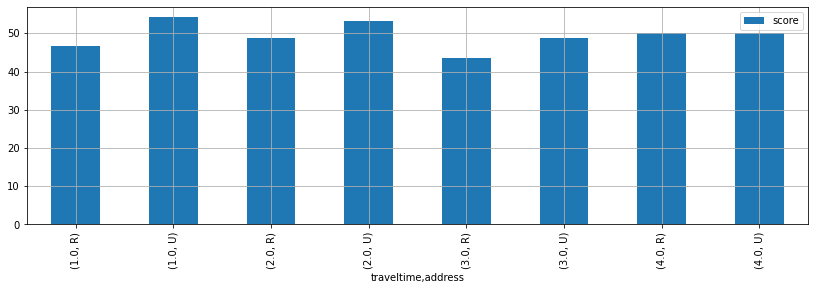

In [30]:
# Гипотеза (место проживания-время-дорога)
csv \
    .pivot_table(values='score', index=['traveltime', 'address'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

# Время пути до школы не влияет на оценки, в то время как место проживания(город или за городом) - влияет

<AxesSubplot:xlabel='Pstatus,guardian'>

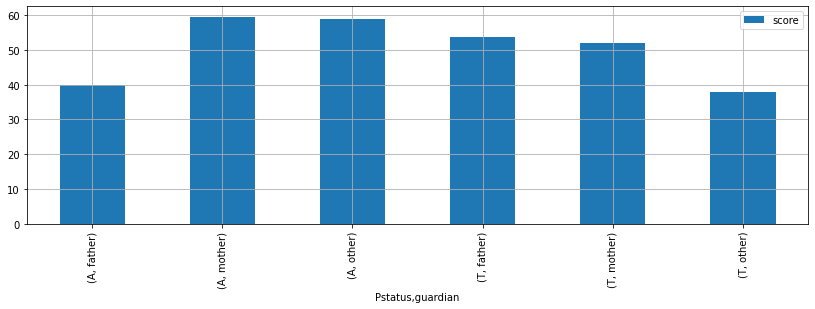

In [31]:
# Гипотеза(баллы-опекун-проживание)
csv \
    .pivot_table(values='score', index=['Pstatus', 'guardian'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

# Средний балл ниже у детей, у которых родители живут раздельно, при этом опекуном является отец, средний балл ниже у детей, чьим опенум не является мать или отец, но рпи этом они живут вместе

<AxesSubplot:xlabel='Mjob,Fjob'>

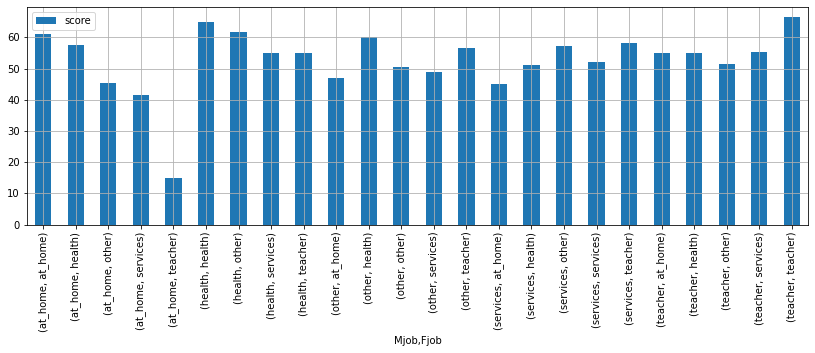

In [32]:
# Гипотеза(баллы-работа)
csv \
    .pivot_table(values='score', index=['Mjob', 'Fjob'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

<AxesSubplot:xlabel='guardian,Fedu,Medu'>

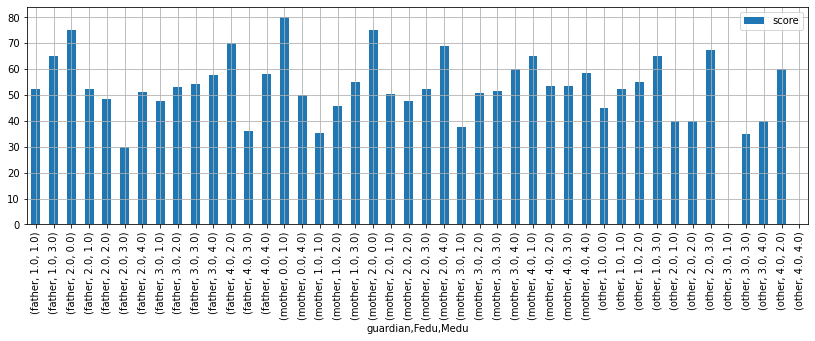

In [33]:
# Гипотеза (опекуны-образование-баллы)
csv \
    .pivot_table(values='score', index=['guardian', 'Fedu', 'Medu'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

# Дети, чьими опекунами являются отцы - имеют средний балл выше; хуже оценки у тех, кто опекуны  не являютмя матерью или отцом

<AxesSubplot:xlabel='internet,studytime'>

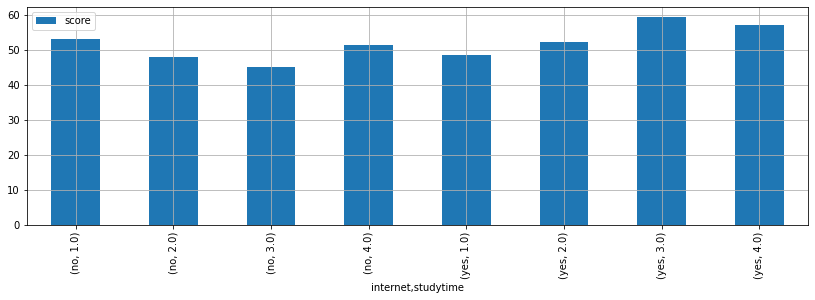

In [34]:
# Гипотеза (интернет-время учебы)
csv \
    .pivot_table(values='score', index=['internet', 'studytime'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

<AxesSubplot:xlabel='famsup'>

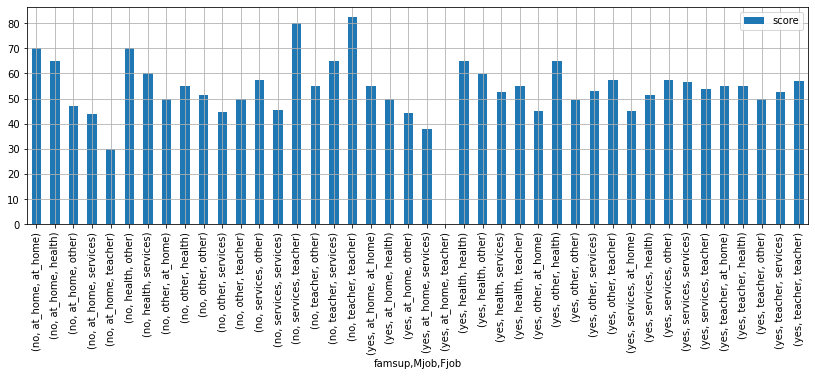

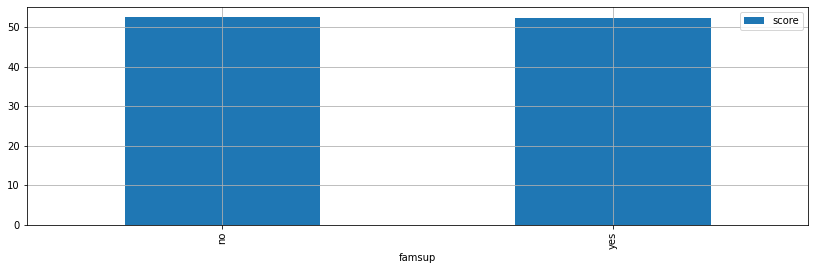

In [35]:
# Гипотеза (семейная поддержка)
csv \
    .pivot_table(values='score', index=['famsup', 'Mjob', 'Fjob'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)

csv \
    .pivot_table(values='score', index=['famsup'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)
# Средний балл к детей, чьи родители не работают и помогают по учебе, ниже

<AxesSubplot:xlabel='romantic,studytime'>

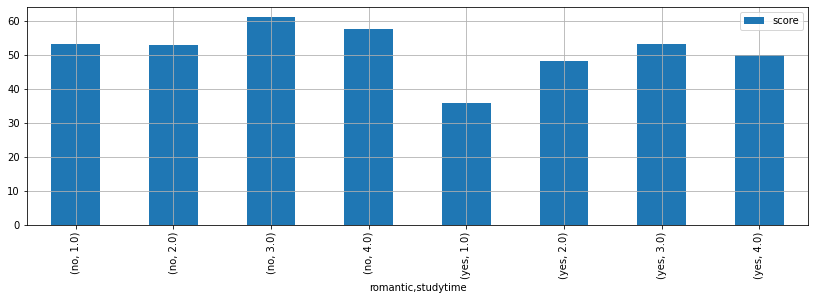

In [36]:
csv \
    .pivot_table(values='score', index=['romantic', 'studytime'], aggfunc='mean') \
    .plot(kind='bar', figsize=(14, 4), grid=True)
# Дети, находящиеся в романтических отношениях имеют меньший средний балл при меньшем времени, уделенном учебе времени

In [37]:
# ВЫВОДЫ


# Для дальнейшего использования берем следующие данные: Medu, Fedu, failures, Mjob, Pjob, guardian, address, т.к. они наиболее ярко влияют на
# оценки.

# Качество данных:
# - много нулей в score, не ясно происхождение
# - в failures - n, если 1<=n<=3, может быть действительно 0, либо больше 3, что вводит в заблуждние: невозможно оценить
# действительно ли неудачи (и их количество) влиют на учебу